<h1>Question 1 : State wise complaints</h1>
<p>The following data is taken from complaint.csv file. We perform certain EDA for this data file</p>

<h3>Importing the required librabries</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Setting the background for graphs using seaborn to white

sns.set_style("whitegrid")

<h3>Importing the dataset i.e complaint.csv</h3>

In [3]:
dataset = pd.read_csv("complaint.csv")

In [4]:
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
#Finding the shape of the dataset

dataset.shape

(2077, 11)

In [6]:
dataset[dataset["State"] == "District of Columbia"] 

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
1982,311271,Internet speed,28-05-2015,28-May-15,12:26:21 PM,Internet,Washington,District of Columbia,20018,Solved,Yes


In [7]:
dataset1 = dataset.drop([1982])

In [8]:
dataset1.shape

(2076, 11)

<h2>[1] Trend Chart for monthly registered complaints</h2>

In [9]:
#Utility function for getting the monthly frequency of complaints in form of a dictionary

def getMonthlyFrequency(dataset):
    frequencies = {"Jan" : 0, "Feb" : 0, "Mar" : 0, "Apr" : 0, "May" : 0, "Jun" : 0, "Jul" : 0, "Aug" : 0, "Sep" : 0, "Oct" : 0, "Nov" : 0, "Dec" : 0}
    for i in dataset["Date_month_year"]:
        l = i.split("-")
        frequencies[l[1]] = frequencies[l[1]] + 1
    return frequencies
print(getMonthlyFrequency(dataset))   

{'Jan': 52, 'Feb': 54, 'Mar': 42, 'Apr': 351, 'May': 297, 'Jun': 984, 'Jul': 44, 'Aug': 61, 'Sep': 51, 'Oct': 47, 'Nov': 35, 'Dec': 59}


In [10]:
#Converting the monthly frequency complaints dictionary into a pandas dataframe named monthly trends

frequencies = getMonthlyFrequency(dataset1)
data = {'Months': list(frequencies.keys()), 'Number of complaints': list(frequencies.values())}
monthlyTrends = pd.DataFrame.from_dict(data)
monthlyTrends

,Months,Number of complaints
0,Jan,52
1,Feb,54
2,Mar,42
3,Apr,351
4,May,296
5,Jun,984
6,Jul,44
7,Aug,61
8,Sep,51
9,Oct,47


<h3>Plotting the graph for monthly complaints</h3>

Text(0.5, 1.0, 'Monthly Trends')

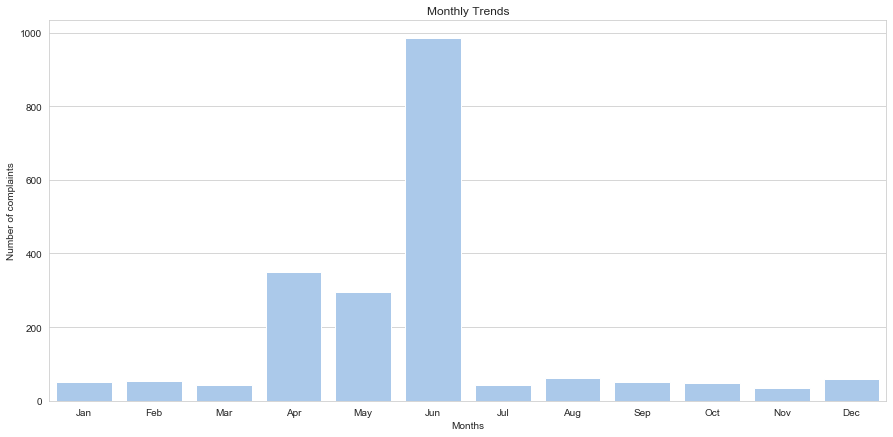

In [11]:
fig, ax = plt.subplots(figsize = (15,7))
sns.set_color_codes("pastel")
sns.barplot(x = "Months", y = "Number of complaints", data = monthlyTrends, color = "b").set_title("Monthly Trends")

<p>Hence we can see that max compalaints are registered in <strong>July</strong>, whereas min complaints are registered in<strong>November</strong></p>

<h2>[2] State wise Stacked bar</h2>

In [12]:
#Utility function to get number of complaints for each state

def getStateFrequency(dataset):
    stateF = {}
    for i in range (2076):
        state = dataset.iloc[i]["State"]
        if state not in stateF.keys():
            stateF[state] = 0
        stateF[state] = stateF[state] + 1
    return stateF
print(getStateFrequency(dataset)) 

{'Maryland': 71, 'Georgia': 264, 'Michigan': 105, 'California': 210, 'New Mexico': 15, 'Indiana': 55, 'Virginia': 56, 'Illinois': 147, 'Pennsylvania': 120, 'Oregon': 45, 'Massachusetts': 55, 'New Hampshire': 11, 'Minnesota': 29, 'Tennessee': 137, 'Florida': 226, 'Alabama': 26, 'Washington': 92, 'Colorado': 75, 'Texas': 69, 'New York': 6, 'New Jersey': 70, 'Maine': 5, 'West Virginia': 10, 'Montana': 1, 'Mississippi': 38, 'Connecticut': 12, 'Vermont': 3, 'Kentucky': 7, 'South Carolina': 18, 'Ohio': 3, 'Utah': 21, 'Delaware': 11, 'Missouri': 3, 'Arkansas': 5, 'Nevada': 1, 'Louisiana': 13, 'Kansas': 1, 'Arizona': 20, 'North Carolina': 2, 'District Of Columbia': 16, 'District of Columbia': 1, 'Iowa': 1}


In [13]:
# Converting number of complaints for each state into a dataframe

stateF = getStateFrequency(dataset1)
data = {'State': list(stateF.keys()), 'Number of complaints': list(stateF.values())}
stateF = pd.DataFrame.from_dict(data)
stateF

,State,Number of complaints
0,Maryland,71
1,Georgia,264
2,Michigan,106
3,California,210
4,New Mexico,15
5,Indiana,55
6,Virginia,56
7,Illinois,147
8,Pennsylvania,120
9,Oregon,45


In [14]:
stateF["Number of complaints"].sum()

2076

<h4>Plotting the data for each state into a graph</h4>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

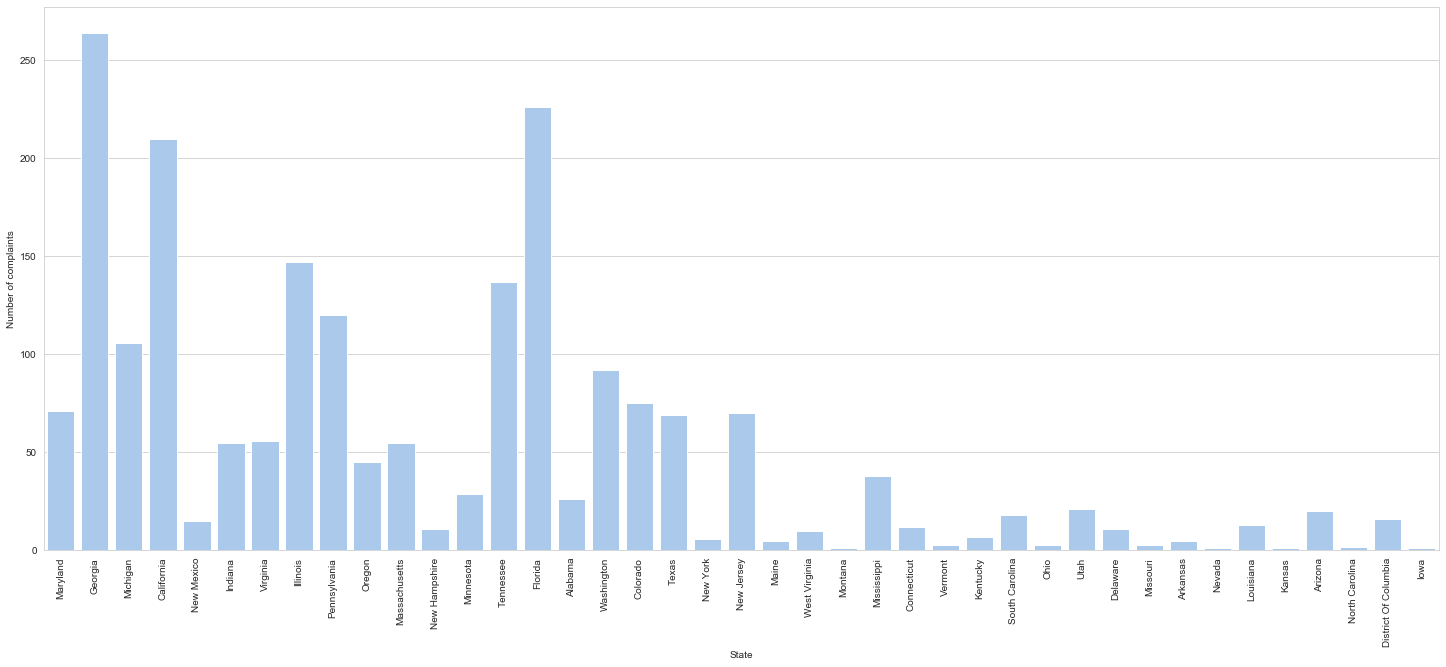

In [15]:
fig, ax = plt.subplots(figsize = (25, 10))
sns.set(font_scale = 1)
sns.set_color_codes("pastel")
g = sns.barplot(x='State', y='Number of complaints', data = stateF, color = "b")
g.set_xlabel("State")
plt.xticks(rotation = 90)

<h4>Finding the complaint distribution for each state</h4>

In [16]:
#Utility function for finding the complaint distribution for each state

def stateWiseComplaintsDistribution(dataset):
    d = {}
    for i in range (2076):
        state = dataset.iloc[i]["State"]
        if state not in d.keys():
            d[state] = {"Closed" : 0, "Open" : 0, "Solved" : 0, "Pending" : 0}
        status = dataset.iloc[i]["Status"]
        d[state][status] += 1
    return d
dictionary = stateWiseComplaintsDistribution(dataset1)

In [17]:
stateComplaints = pd.DataFrame.from_dict(dictionary)
stateComplaints = stateComplaints.T

<h3>Plotting the state wise complaints as a stacked bar graph</h3>

Text(0, 0.5, 'Number of complaints')

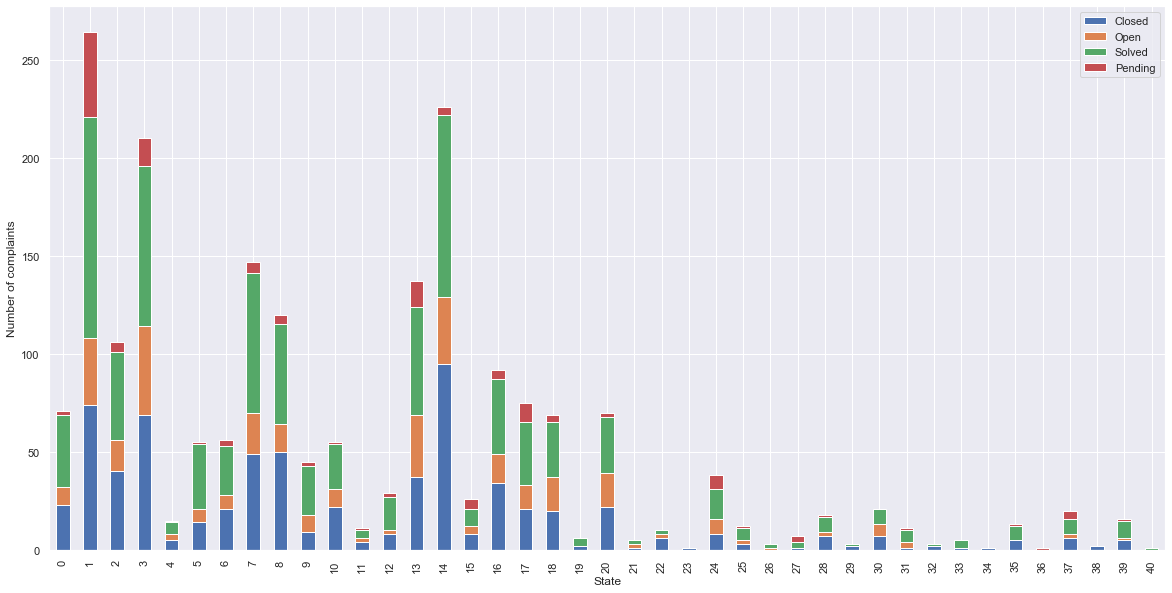

In [87]:
stateComplaints.plot.bar(stacked = True, figsize = (20,10))
plt.xlabel("State")
plt.ylabel("Number of complaints")

<h2>[5] Reporting which state have maximum and minimum complaints</h2>

In [19]:
highest = stateF[stateF["Number of complaints"] == 264]["State"]
lowest = stateF[stateF["Number of complaints"] == 1]["State"]
print("Highest Complaints : " + highest)
print("Lowest Complaints : " + lowest)

1    Highest Complaints : Georgia
Name: State, dtype: object
23    Lowest Complaints : Montana
34     Lowest Complaints : Nevada
36     Lowest Complaints : Kansas
40       Lowest Complaints : Iowa
Name: State, dtype: object


<p>State with maximum complaints : <strong>Georgia</strong></p>
<br>
<p>State with minimum complaints : <strong>Montana, Nevada, Kansas, Iowa</strong></p>


<h2>[6] Finding states with highest and lowest frquency of unresolved complaints</h2>

In [20]:
stateComplaints.reset_index(inplace = True) 
stateComplaints.head()

,index,Closed,Open,Solved,Pending
0,Maryland,23,9,37,2
1,Georgia,74,34,113,43
2,Michigan,40,16,45,5
3,California,69,45,82,14
4,New Mexico,5,3,6,1


In [21]:
#Finding the shape of the dataframe

stateComplaints.shape

(41, 5)

<p>The cases that will be unresolved are mainly open and pending cases</p>

In [22]:
#Utility function to sum up open and pending cases as these are the categories for unresolved cases

def findUnresolvedComplaints(stateComplaints):
    stateUnresolvedComplaints= {}
    for i in range(41):
        state = stateComplaints.iloc[i]["index"]
        open = stateComplaints.iloc[i]["Open"]
        pending = stateComplaints.iloc[i]["Pending"]
        stateUnresolvedComplaints[state] = open + pending
    return stateUnresolvedComplaints
stateUnresolvedComplaints = findUnresolvedComplaints(stateComplaints)
stateUnresolvedComplaints

{'Maryland': 11,
 'Georgia': 77,
 'Michigan': 21,
 'California': 59,
 'New Mexico': 4,
 'Indiana': 8,
 'Virginia': 10,
 'Illinois': 27,
 'Pennsylvania': 19,
 'Oregon': 11,
 'Massachusetts': 10,
 'New Hampshire': 3,
 'Minnesota': 4,
 'Tennessee': 45,
 'Florida': 38,
 'Alabama': 9,
 'Washington': 20,
 'Colorado': 22,
 'Texas': 21,
 'New York': 0,
 'New Jersey': 19,
 'Maine': 2,
 'West Virginia': 2,
 'Montana': 0,
 'Mississippi': 15,
 'Connecticut': 3,
 'Vermont': 1,
 'Kentucky': 3,
 'South Carolina': 3,
 'Ohio': 0,
 'Utah': 6,
 'Delaware': 4,
 'Missouri': 0,
 'Arkansas': 0,
 'Nevada': 0,
 'Louisiana': 1,
 'Kansas': 1,
 'Arizona': 6,
 'North Carolina': 0,
 'District Of Columbia': 2,
 'Iowa': 0}

In [23]:
#Storing the min and max complaints and using to find the states

temp1 = min(stateUnresolvedComplaints.values())
temp2 = 77
minComplaintsState = [key for key in stateUnresolvedComplaints.keys() if stateUnresolvedComplaints[key] == temp1]
maxComplaintsState = [key for key in stateUnresolvedComplaints.keys() if stateUnresolvedComplaints[key] == temp2]

In [24]:
minComplaintsState

['New York',
 'Montana',
 'Ohio',
 'Missouri',
 'Arkansas',
 'Nevada',
 'North Carolina',
 'Iowa']

In [25]:
maxComplaintsState

['Georgia']

<p>State with maximum unresolved cases  : <strong>Georgia</strong></p>
<br>
<p>States with minimim unresolved cases  : <strong>New York, Montana, Ohio, Missouri, Arkansas, Nevada, North Carolina, Iowa </strong></p>

<br>
<br>
<br>
<br>

<h1>Question 2 :Weekly sales for marts</h1>
<p>Weekly sales for 45 stores are given to us. We perform exploratory data analysis and gain insights of the data. In the end we build a multi-variate linear regression model for store 2.</p>

<h3>Importing the dataset</h3>

In [26]:
dataset = pd.read_csv("Mart.csv")

In [27]:
#Analysing the dataset

dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<h3>Shape of the dataset</h3>

In [28]:
dataset.shape

(6435, 8)

<h3>Stores in consideration</h3>

In [29]:
dataset["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

<h2>[1] Finding the store with the maximum sales</h2>

In [30]:
#Utility function to get the sales of the individual store

def getMaxSales(dataset):
    sales = {}
    for i in range(6435):
        Store = dataset.iloc[i]["Store"]
        if Store not in sales.keys():
            sales[Store] = 0
        sales[Store] += dataset.iloc[i]["Weekly_Sales"]
        
    return sales
storeSales = getMaxSales(dataset)

In [31]:
#Converting into a dataframe

storeSales = {'Store': list(storeSales.keys()), 'Sales': list(storeSales.values())}
storeSales = pd.DataFrame.from_dict(storeSales)
storeSales.head(5)

,Store,Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


<h3>Plotting the sales of the stores as a bar graph</h4>

Text(0.5, 1.0, 'Storewise Sales')

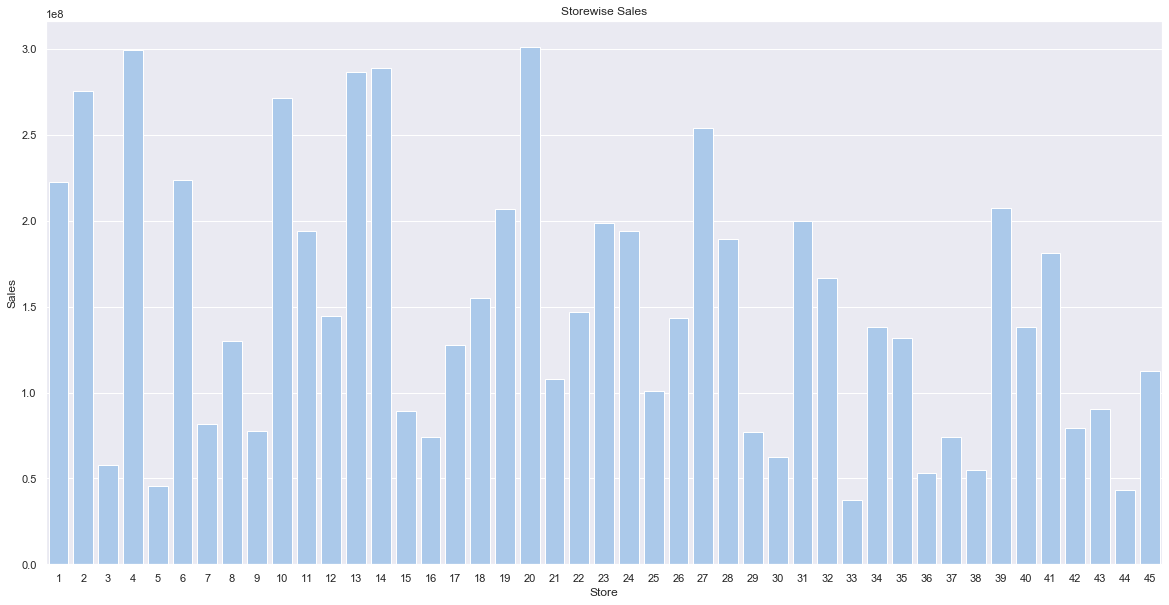

In [32]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set_color_codes("pastel")
sns.barplot(x = "Store", y = "Sales", data = storeSales, color = "b").set_title("Storewise Sales")

In [33]:
#Finding max and min stores sales 

storeM = storeSales[storeSales["Sales"] == max(storeSales["Sales"])]["Store"].values
storem = storeSales[storeSales["Sales"] == min(storeSales["Sales"])]["Store"].values
print("The store with maximum sales is : " + str(storeM[0]))
print("The store with minimum sales is : " + str(storem[0]))

The store with maximum sales is : 20
The store with minimum sales is : 33


<p>Store with maximum sale : <strong>20</strong></p>
<br>
<p>Store with minimum sale : <strong>33</strong></p>

<h2>[2] Finding the store with max standard deviation</h2>

In [34]:
#Making a new dataframe

d = dataset.groupby(by = ["Store"]).std()
d.reset_index(inplace = True)
d.columns = ["Store", "Standard_Deviation", "Holiday_Flag", "Temperature", "Temperature" ,"CPI", "Unemployment"]
d.head()

,Store,Standard_Deviation,Holiday_Flag,Temperature,Temperature,CPI,Unemployment
0,1,155980.767761,0.255926,14.250486,0.427313,4.350890,0.383749
1,2,237683.694682,0.255926,15.492766,0.427313,4.342286,0.615414
2,3,46319.631557,0.255926,12.645851,0.427313,4.434232,0.447245
3,4,266201.442297,0.255926,16.180023,0.416967,1.858300,1.421267
4,5,37737.965745,0.255926,14.225352,0.427313,4.364848,0.387415


<h3>Plotting the standard deviation in bar plot</h3>

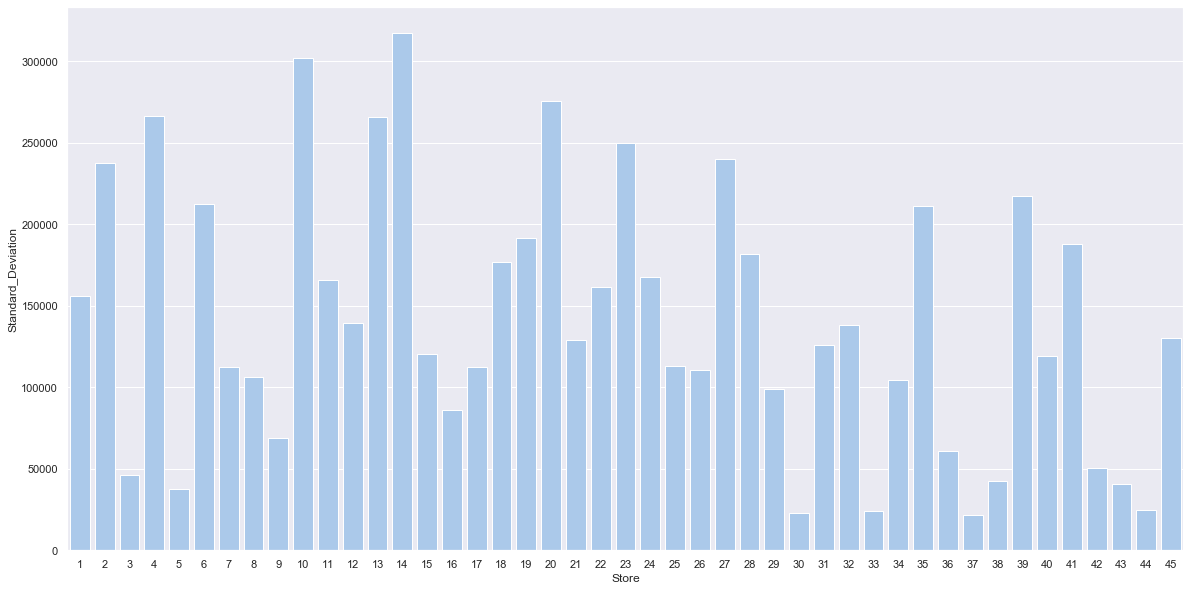

In [35]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set_color_codes("pastel")
sns.barplot(x = "Store", y = "Standard_Deviation", data = d, color = "b")

In [38]:
sd = d[d["Store"] == 14]["Standard_Deviation"].values
sd

array([317569.94947551])

In [39]:
e = dataset.groupby(by = ["Store"]).mean()
e.reset_index(inplace = True)
e.columns = ["Store", "Mean", "Holiday_Flag", "Temperature", "Temperature" ,"CPI", "Unemployment"]
mean = e[e["Store"] == 14]["Mean"].values
mean

array([2020978.40097902])

<p>We can see that store <strong>14</strong> has maximum standard deviation, standard devation is <strong>317569.94947551</strong> and mean is <strong>2020978.40097902</strong></p>

<h3>Finding the coefficient of mean to standard deviation</h3>
<br>
<p>coefficient of mean to standard deviation = (sd/mean)*100</p>

In [40]:
Coeff_of_mean_to_sd = (sd[0,]/mean[0,]) * 100
print("The coeff of mean to standard deviation is : " + str(Coeff_of_mean_to_sd))

The coeff of mean to standard deviation is : 15.71367360094833


<p>Coeff of mean to standard deviation = <strong>15.71367360094833</strong></p>

<h2>[3] Finding impact of holidays</h2>

In [46]:
#Number of unique dates

dataset["Date"].nunique()

143

In [47]:
#Utility function that calculate the mean sale of all stores at a particular holiday

def holidayAffect(dataset):
    holidaySales = {}
    for i in range(6435):
        if dataset.iloc[i]["Holiday_Flag"] == 1:
            date = dataset.iloc[i]["Date"]
            if date not in holidaySales.keys():
                holidaySales[date] = 0
            holidaySales[date] = holidaySales[date] + dataset.iloc[i]["Weekly_Sales"]
    return holidaySales

holidaySales = holidayAffect(dataset)

for i in holidaySales.keys():
    holidaySales[i] = holidaySales[i] / 45
    
print(holidaySales)

{'12-02-2010': 1074148.3917777783, '10-09-2010': 1014097.7297777778, '26-11-2010': 1462688.9608888887, '31-12-2010': 898500.4222222222, '11-02-2011': 1051915.3953333339, '09-09-2011': 1039182.8339999999, '25-11-2011': 1479857.8946666664, '30-12-2011': 1023165.800888889, '10-02-2012': 1111320.176, '07-09-2012': 1074001.318}


In [48]:
#Mean sales for all stores for non-holidays days 

def meanNonHolidaySale(dataset):
    mean = 0
    c = 0
    for i in range(6435):
        if dataset.iloc[i]["Holiday_Flag"] == 0:
           mean = mean + dataset.iloc[i]["Weekly_Sales"]
           c = c + 1
    return mean/c
meanNonHoliday = meanNonHolidaySale(dataset)
meanNonHoliday

1041256.3802088564

In [49]:
#Converting the holiday sales dictionary into a dataframe

holidaySales = {'Holiday': list(holidaySales.keys()), 'Sales': list(holidaySales.values())}
holidaySales = pd.DataFrame.from_dict(holidaySales)
holidaySales

,Holiday,Sales
0,12-02-2010,1.074148e+06
1,10-09-2010,1.014098e+06
2,26-11-2010,1.462689e+06
3,31-12-2010,8.985004e+05
4,11-02-2011,1.051915e+06
5,09-09-2011,1.039183e+06
6,25-11-2011,1.479858e+06
7,30-12-2011,1.023166e+06
8,10-02-2012,1.111320e+06
9,07-09-2012,1.074001e+06


<h3>Plotting graphs for sales in holidays</h3>

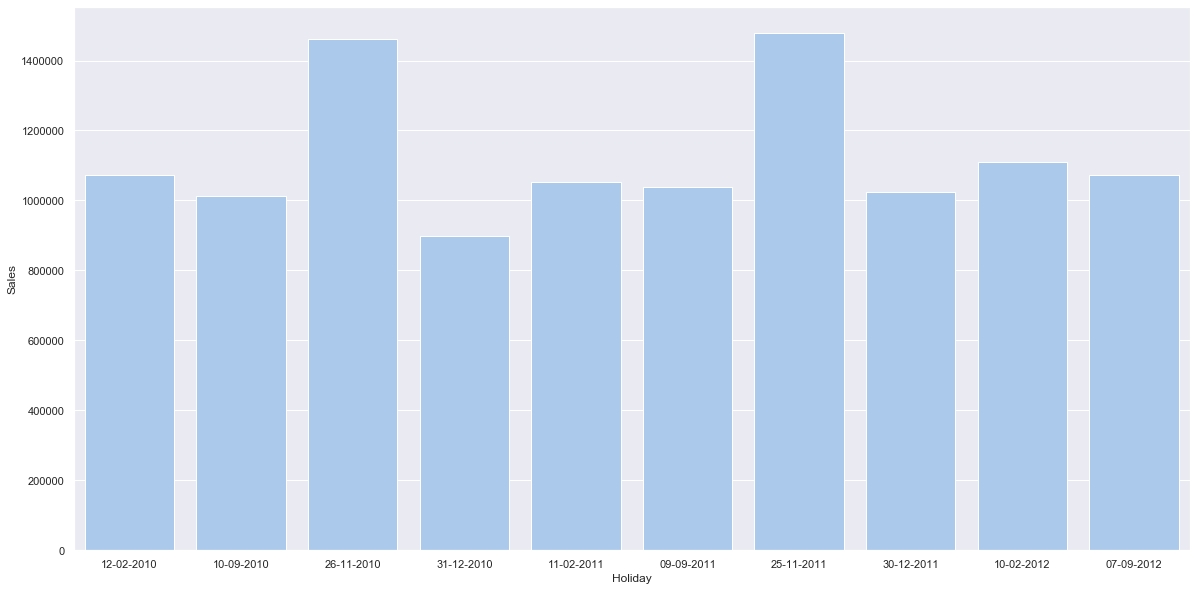

In [50]:
fig, ax = plt.subplots(figsize = (20,10))
sns.set_color_codes("pastel")
sns.barplot(x = "Holiday", y = "Sales", data = holidaySales, color = "b")

<p>Holiday sales are maximum on <strong>26-11-2010</strong> and <strong>25-11-2011</strong>, i.e in the month of November</p>

<h3>Finding those holidays whose sale is more than mean non-holiday sales</h3>

In [51]:
#Utility function to find holidays whose sale is more than mean non-holiday sales

holidaysBetterSales = []
for i in holidaySales["Sales"]:
    if i > meanNonHoliday:
        holidaysBetterSales.append(holidaySales[holidaySales["Sales"] == i]["Holiday"].values[0,])
print("Holidays having higher sales than mean sales of non-holidays : ")
for i in holidaysBetterSales:
    print(i)

Holidays having higher sales than mean sales of non-holidays : 
12-02-2010
26-11-2010
11-02-2011
25-11-2011
10-02-2012
07-09-2012


<p>Holidays whose sale is more than mean non-holiday sales are : </p>
<br>
<strong>12-02-2010</strong>
<br>
<strong>26-11-2010</strong>
<br>
<strong>11-02-2011</strong>
<br>
<strong>25-11-2011</strong>
<br>
<strong>10-02-2012</strong>
<br>
<strong>07-09-2012</strong>

<h2>[4] Finding monthly sales for the stores</h2>

In [52]:
#Utility function to store monthwise sales for each year

def yearWiseMonthlySales(dataset):
    sales = {}
    for i in range (6435):
        date = dataset.iloc[i]["Date"].split("-")
        month = int(date[1])
        year = int(date[2])
        if year not in sales.keys():
            sales[year] = [0,0,0,0,0,0,0,0,0,0,0,0]
        sale = dataset.iloc[i]["Weekly_Sales"]
        sales[year][month-1] +=  sale
    return sales
sales = yearWiseMonthlySales(dataset)
print(sales)

{2010: [0, 190332983.04, 181919802.5, 231412368.0500001, 186710934.34000003, 192246172.36000004, 232580125.9800001, 187640110.89000002, 177267896.36999997, 217161824.02, 202853370.14, 288760532.71999997], 2011: [163703966.83000007, 186331327.86999992, 179356448.29000002, 226526510.9700001, 181648158.16, 189773385.19000003, 229911398.87000012, 188599332.24999988, 220847738.41999993, 183261283.15000007, 210162354.87, 288078102.4800002], 2012: [168894471.66000006, 192063579.54000008, 231509650.4899999, 188920905.95000002, 188766479.4499998, 240610329.28999984, 187509452.40000004, 236850765.67999992, 180645544.46999988, 184361680.41999996, 0, 0]}


In [53]:
#Converting into dictionary and renaming indices

storeWiseMonthlySale = pd.DataFrame.from_dict(sales)
storeWiseMonthlySale = storeWiseMonthlySale.rename(index = {0 : "Jan", 1 : "Feb", 2 :"Mar", 3 :"Apr", 4 : "May", 5 : "Jun", 6 : "Jul", 7 : "Aug", 8 : "Sep", 9 : "Oct", 10 : "Nov", 11 : "Dec"})

In [54]:
storeWiseMonthlySale

,2010,2011,2012
Jan,0.000000e+00,1.637040e+08,1.688945e+08
Feb,1.903330e+08,1.863313e+08,1.920636e+08
Mar,1.819198e+08,1.793564e+08,2.315097e+08
Apr,2.314124e+08,2.265265e+08,1.889209e+08
May,1.867109e+08,1.816482e+08,1.887665e+08
Jun,1.922462e+08,1.897734e+08,2.406103e+08
Jul,2.325801e+08,2.299114e+08,1.875095e+08
Aug,1.876401e+08,1.885993e+08,2.368508e+08
Sep,1.772679e+08,2.208477e+08,1.806455e+08
Oct,2.171618e+08,1.832613e+08,1.843617e+08


<h3>PLotting the stacked graph</h3>

Text(0, 0.5, 'Sales')

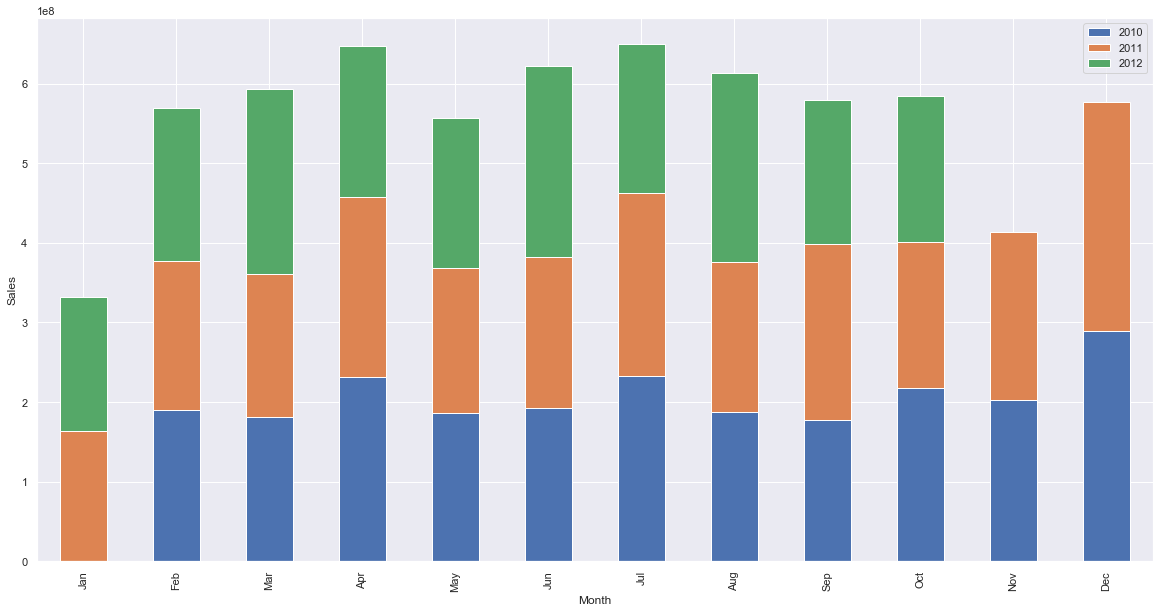

In [86]:
storeWiseMonthlySale.plot.bar(stacked = True, figsize = (20,10))
plt.xlabel("Month")
plt.ylabel("Sales")

<p>We can see that the months of  April, July and December have high sales. Also year details some months are missing in the dataset</p>

<h2>Linear Regression model for predicting sales for Store 2</h2>

In [56]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [57]:
#Segregating store 2 and making dataframe for it

store2 = {"Date" : [], "Weekly_Sales" : [], "Holiday_Flag" : [], "Temperature"  : [], "Fuel_Price" : [], "CPI" : [], "Unemployment" : []}
for i in range(6435):
    if dataset.iloc[i]["Store"] == 2:
        store2["Date"].append(dataset.iloc[i]["Date"])
        store2["Weekly_Sales"].append(dataset.iloc[i]["Weekly_Sales"])
        store2["Holiday_Flag"].append(dataset.iloc[i]["Holiday_Flag"])
        store2["Temperature"].append(dataset.iloc[i]["Temperature"])
        store2["Fuel_Price"].append(dataset.iloc[i]["Fuel_Price"])
        store2["CPI"].append(dataset.iloc[i]["CPI"])
        store2["Unemployment"].append(dataset.iloc[i]["Unemployment"])
store2Data = pd.DataFrame.from_dict(store2)
store2Data.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,05-02-2010,2136989.46,0,40.19,2.572,210.752605,8.324
1,12-02-2010,2137809.50,1,38.49,2.548,210.897994,8.324
2,19-02-2010,2124451.54,0,39.69,2.514,210.945160,8.324
3,26-02-2010,1865097.27,0,46.10,2.561,210.975957,8.324
4,05-03-2010,1991013.13,0,47.17,2.625,211.006754,8.324


<p>Shape of dataset</p>

In [58]:
store2Data.shape

(143, 7)

<p>Restructuring date</p>

In [59]:
reStructuredDates = []
for i in range (1, 144):
    reStructuredDates.append(i)

In [60]:
store2Data["RestructuredDates"] = reStructuredDates
store2Data

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,RestructuredDates
0,05-02-2010,2136989.46,0,40.19,2.572,210.752605,8.324,1
1,12-02-2010,2137809.50,1,38.49,2.548,210.897994,8.324,2
2,19-02-2010,2124451.54,0,39.69,2.514,210.945160,8.324,3
3,26-02-2010,1865097.27,0,46.10,2.561,210.975957,8.324,4
4,05-03-2010,1991013.13,0,47.17,2.625,211.006754,8.324,5
...,...,...,...,...,...,...,...,...
138,28-09-2012,1746470.56,0,79.45,3.666,222.616433,6.565,139
139,05-10-2012,1998321.04,0,70.27,3.617,222.815930,6.170,140
140,12-10-2012,1900745.13,0,60.97,3.601,223.015426,6.170,141
141,19-10-2012,1847990.41,0,68.08,3.594,223.059808,6.170,142


<h3>Importing necessary libraries</h3>

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [67]:
X = store2Data[["RestructuredDates", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].values
y = store2Data[["Weekly_Sales"]].values

<h3>Preprocessing the data</h3>
<h4>Normalizing the data</h4>

In [68]:
X = preprocessing.normalize(X)

<h4>Splitting the data into testing and training set </h4>

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((114, 6), (114, 1), (29, 6), (29, 1))

<h3>Building the linear regression model</h3>
<br>
<p>We train the model on X_train and y_train and analyse the prediciton on X_test and y_test</p>

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)
yPred = lm.predict(X_test)
yPred.shape

(29, 1)

<h4>Intercept and coefficients</h4>

In [71]:
print(lm.coef_)
print(lm.intercept_)

[[   126353.02909243   6870875.16388835  -2319911.92983954
  -50604855.48435206  -7860070.88511851  83524668.78287096]]
[7592131.18362268]


<p>Theta 0 = <strong>7592131.18362268</strong><p>
<br>
<p>Theta 1 = <strong>126353.02909243</strong><p>
<br>
<p>Theta 2 = <strong>6870875.16388835</strong><p>
<br>
<p>Theta 3 = <strong>-2319911.92983954</strong><p>
<br>
<p>Theta 4 = <strong>-50604855.48435206</strong><p>
<br>
<p>Theta 5 = <strong>-7860070.88511851</strong><p>
<br>
<p>Theta 6 = <strong>83524668.78287096</strong><p>


In [72]:
coeff = lm.coef_
coeff.shape

(1, 6)

In [73]:
Coeff = []
for i in range(0, 6):
    Coeff.append(coeff[0,i])
print(Coeff)

[126353.0290924289, 6870875.163888349, -2319911.929839542, -50604855.48435206, -7860070.885118506, 83524668.78287096]


In [74]:
Coeff = [abs(number) for number in Coeff]

In [75]:
Coeff

[126353.0290924289,
 6870875.163888349,
 2319911.929839542,
 50604855.48435206,
 7860070.885118506,
 83524668.78287096]

In [76]:
Coeff = (Coeff/sum(Coeff)*100)

In [77]:
Coeff

array([ 0.08350787,  4.541024  ,  1.53325093, 33.44521008,  5.19479247,
       55.20221465])

<p>Dependence on date = <strong>0.08350787%</strong><p>
<br>
<p>Dependence on Holiday = <strong>4.541024%</strong><p>
<br>
<p>Dependence on Temp = <strong>1.53325093%</strong><p>
<br>
<p>Dependence on Fuel Price = <strong>33.44521008%</strong><p>
<br>
<p>Dependence on CPI = <strong>5.1947924%7</strong><p>
<br>
<p>Dependence on Uemployment = <strong>55.20221465%</strong><p>
<br>

<h3>Error in the predictions</h3>

In [78]:
def errorCalc(yPred, y_test):
    error = 0
    for i in range(29):
        error += abs(yPred[i] - y_test[i])
    return error/29
print(errorCalc(yPred, y_test))

[172248.28875942]


<p>The average error in prediction is almost = <strong>172248.28875942</strong></p>

In [82]:
meanSales = store2Data["Weekly_Sales"].mean()
meanSales

1925751.3355244761

In [83]:
print("% Error = " + str(172248.28875942/meanSales*100))

% Error = 8.94447198773503


<p>Error percentage: <strong>8.94447198773503%</strong></p>